In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

# Visualizing Data

In [4]:
def find_missing(serie):
    dates = pd.date_range(start=serie.index.min(), end=serie.index.max(), freq="H")
    missing_dates = []
    
    continous_part = []
    
    start = serie.index.min()
    end = serie.index.min()
    for date in dates:
        if not date in serie.index:
            missing_dates.append(date)
            continous_part.append((start,end))
            start = date
            end = date
        else:
            end = date

    if len(missing_dates) == 0:
        print("No missing values")
        return serie.index.min(), serie.index.max()
    
    plt.hist(missing_dates)
    plt.show()
    
    missing = pd.DataFrame(missing_dates)
    missing.index = missing[0]
    
    length = []
    for start,end in continous_part:
        length.append((end - start).days)
    best_start,best_end = continous_part[np.argmax(length)]
    print(best_start,best_end)
    
    return best_start,best_end

In [6]:
# Loading data
best_length = 0
for file in ["canela1.csv", "canela2.csv", "monte_redondo.csv"]:
    data = pd.read_csv('data/potency/'+file, names=["t","potency"],index_col="t")                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
    data.index=pd.to_datetime(data.index)
    print("FILE: ", file)
    start,end = find_missing(data)
    data_filtered = data[start:end]
    if len(data_filtered) > best_length:
        best_data = data_filtered
    find_missing(data_filtered)
    print("Contiguous data length: ",len(data_filtered))

FILE:  canela1.csv
No missing values
No missing values
Contiguous data length:  62640
FILE:  canela2.csv
No missing values
No missing values
Contiguous data length:  62640
FILE:  monte_redondo.csv
No missing values
No missing values
Contiguous data length:  61968


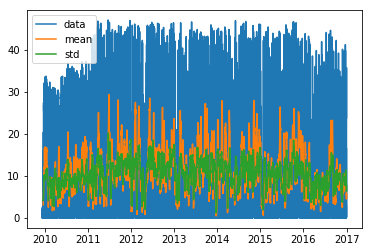

In [7]:
mean = best_data.rolling(window=200,center=False).mean()
std = best_data.rolling(window=200,center=False).std()

plt.plot(best_data)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

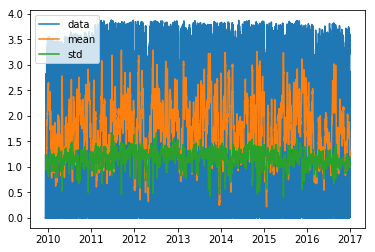

In [8]:
log_data = np.log(best_data+1)
mean = log_data.rolling(window=200,center=False).mean()
std = log_data.rolling(window=200,center=False).std()

plt.plot(log_data)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

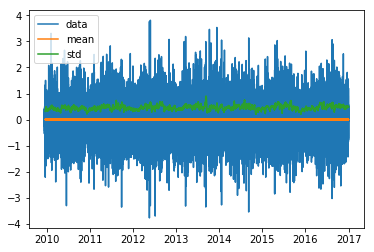

In [9]:
diff_log = pd.DataFrame(np.diff(np.log(best_data+1),axis=0))
diff_log.index = best_data.index[:-1]
mean = diff_log.rolling(window=200,center=False).mean()
std = diff_log.rolling(window=200,center=False).std()

plt.plot(diff_log)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

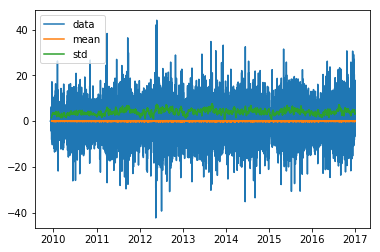

In [10]:
diff_data = pd.DataFrame(np.diff(best_data,axis=0))
diff_data.index = best_data.index[:-1]
mean = diff_data.rolling(window=200,center=False).mean()
std = diff_data.rolling(window=200,center=False).std()

plt.plot(diff_data)
plt.plot(mean)
plt.plot(std)
plt.legend(["data","mean", "std"])

In [11]:
from pandas.plotting import autocorrelation_plot

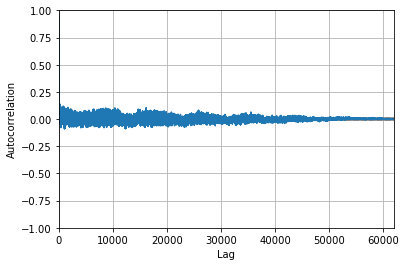

In [12]:
autocorrelation_plot(best_data)

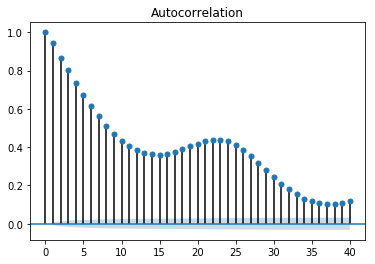

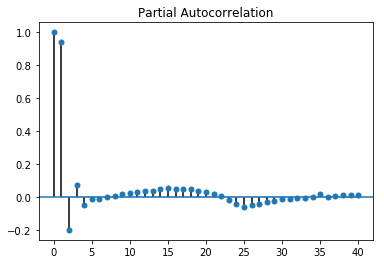

In [13]:
sm.graphics.tsa.plot_acf(best_data, lags=40)
sm.graphics.tsa.plot_pacf(best_data,lags=40)
print()

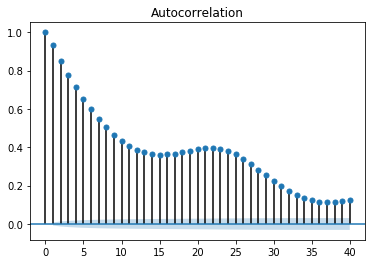

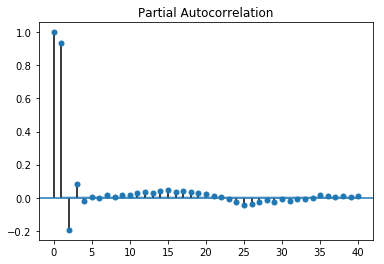

In [14]:
sm.graphics.tsa.plot_acf(log_data, lags=40)
sm.graphics.tsa.plot_pacf(log_data,lags=40)
print()

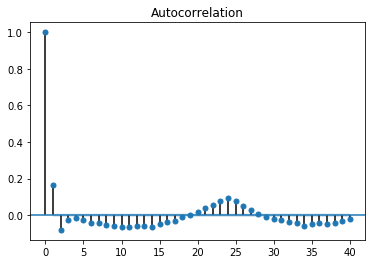

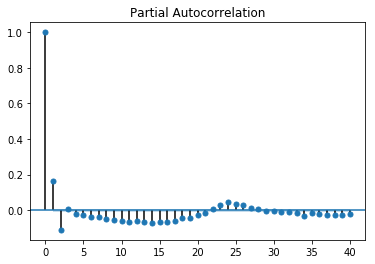

In [15]:
sm.graphics.tsa.plot_acf(diff_data, lags=40)
sm.graphics.tsa.plot_pacf(diff_data,lags=40)
print()

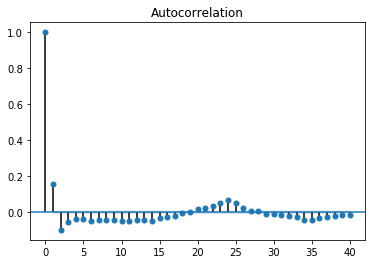

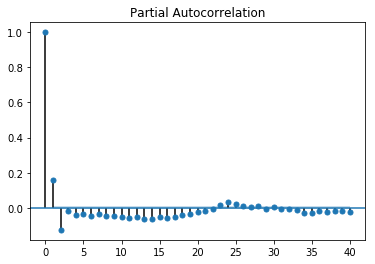

In [16]:
sm.graphics.tsa.plot_acf(diff_log, lags=40)
sm.graphics.tsa.plot_pacf(diff_log,lags=40)
print()

To determine the ARIMA parameters (p,d,q) we use ACF and PACF
* p: comes from PACF
* d: 1 if is diff
* q: comes from ACF

From the previous plots we will use
* (1,1,1)

In [38]:
data_len = len(best_data)
train_perc = 0.9
train_data = int(0.9*data_len)
train = best_data[:train_data]
test = best_data[train_data:]